In [116]:
from scipy import ndimage, misc
from scipy.ndimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing
import numpy as np
import imageio
import matplotlib.pyplot as plt
from PIL import Image

In [117]:
# Mon SE
# disk avec radius passed as an argument
def disk(r):
    x = np.arange(-r, r+1, 1)
    xx, yy = np.meshgrid(x,x)
    d = np.sqrt(xx**2 + yy**2)
    return d<=r
# returns array of binary values, spacially distributed as a circle


## 1.2 Elementary operators

Text(0.5, 1.0, 'Original image')

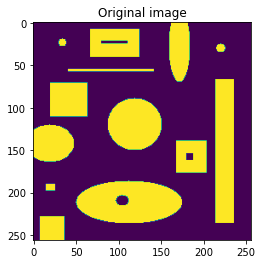

In [52]:
B = imageio.imread("B.bmp")
B = B>100
plt.imshow(B)
plt.title('Original image')

In [22]:
square = np.ones((5,5))

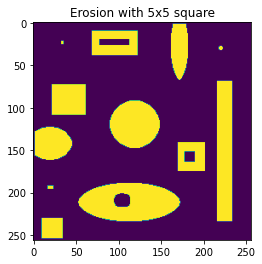

In [113]:
B_square_erode = ndimage.morphology.binary_erosion(B, structure=square)

plt.imshow(B_square_erode)
plt.title("Erosion with 5x5 square")


# Error when saving
#imageio.imwrite('erosion.png', B_square_erode)

to_save = Image.fromarray(B_square_erode)
to_save.save("erosion.png")

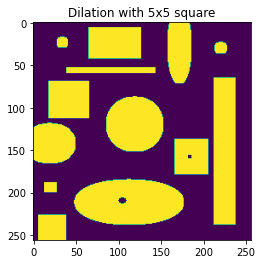

In [35]:
B_square_dilate = ndimage.morphology.binary_dilation(B, structure=square)

plt.imshow(B_square_dilate)
plt.title("Dilation with 5x5 square")


to_save = Image.fromarray(B_square_dilate)
to_save.save("dilation.png")

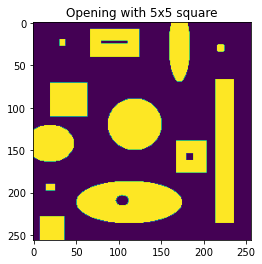

In [36]:
B_square_opening = ndimage.morphology.binary_opening(B, structure=square)

plt.imshow(B_square_opening)
plt.title("Opening with 5x5 square")


to_save = Image.fromarray(B_square_opening)
to_save.save("opening.png")

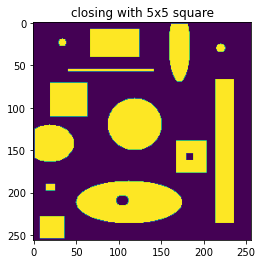

In [37]:
B_square_closing = ndimage.morphology.binary_closing(B, structure=square)

plt.imshow(B_square_closing)
plt.title("closing with 5x5 square")


to_save = Image.fromarray(B_square_closing)
to_save.save("closing.png")

## 1.3 Morphological reconstruction

In [65]:
def rec(image, marker):
    M = np.minimum(marker, image)
    area = ndimage.measurements.sum(M)
    s = 0
    se = np.array([
        [0,1,0],
        [1,1,1],
        [0,1,0]
    ])
    while (area!=s):
        s = area
        M = np.minimum(image, binary_dilation(M, structure=se))
        area = ndimage.measurements.sum(M)
        
    return M

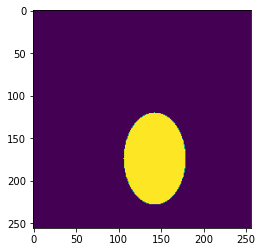

In [102]:
A,M = imageio.imread("A.bmp"), imageio.imread("M.bmp")
A = A>100
M = M>100
plt.imshow(rec(A,M))

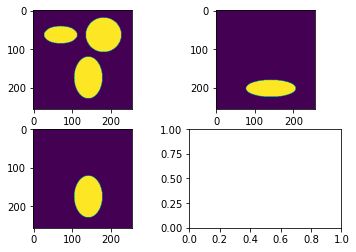

In [103]:
figs, axs = plt.subplots(2,2)
axs[0,0].imshow(A)
axs[0,1].imshow(M)
axs[1,0].imshow(rec(A,M))
axs[1,1] = None

## Operators by reconstruction

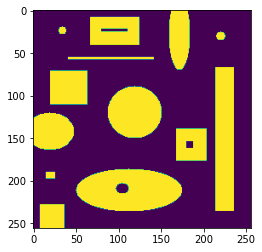

In [126]:
# Original image for reference

plt.imshow(B)

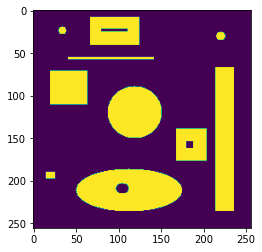

In [127]:
# 1. border objects

def remove_border_objects(A):
    m,n = A.shape
    M = np.zeros((m,n))
    M[0,:], M[m-1,:], M[:,0], M[:,n-1] = 1,1,1,1
    
    mask = rec(A,M)
    return A^mask

plt.imshow(remove_border_objects(B))

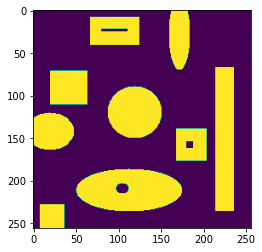

In [128]:
# 2. small objects

def remove_small_objects(A, size):
    se = np.ones((size, size))
    
    mask = binary_erosion(A, structure=se)
    return rec(A,mask)

plt.imshow(remove_small_objects(B,10))

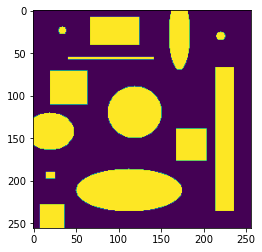

In [129]:
# 3. closing holes

def close_holes(A):
    Ac = ~A
    m,n = A.shape
    M = np.zeros((m,n))
    M [0,:], M[m-1,:], M [:,0], M[:,n-1] = 1,1,1,1
    mask = rec(Ac,M)
    return ~mask

plt.imshow(close_holes(B))

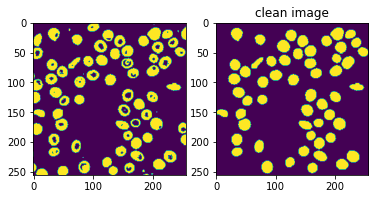

In [135]:
cells = imageio.imread('cells.jpg')
cells = cells<98

#imageio.imwrite('cellsbw.png',cells)
to_save = Image.fromarray(cells)
to_save.save("cellsbw.png")

B = close_holes(cells)
B = remove_border_objects(B)
B = remove_small_objects(B, 5)

plt.subplot(1,2,1)
plt.imshow(cells)

plt.subplot(1,2,2)
plt.imshow(B);

plt.title ('clean image')
plt.show()
to_save = Image.fromarray(B)
to_save.save("clean.png")